
Cada linha representa um cliente, cada coluna contém os atributos do cliente descritos na coluna Metadados.

O conjunto de dados inclui informações sobre:

Clientes que saíram no último mês - a coluna é chamada de rotatividade<br>
Serviços que cada cliente assinou - telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes<br>
Informações da conta do cliente - há quanto tempo ele é cliente, contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais<br>
Informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes

In [1]:
#import das libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%load_ext nb_black
plt.style.use("fivethirtyeight")


import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# criação do dataframe
file = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.DataFrame(file)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<IPython.core.display.Javascript object>

In [37]:
#Função para análise exploratória 
def EDA (df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = sorted(df.columns.str.lower().tolist(), reverse=False)
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), colunas))

    return eda

EDA(df)

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
churn,0,0.0,object,7043,NaN,NaN,Yes,No,NaN,2
contract,0,0.0,object,7043,NaN,NaN,Two year,Month-to-month,NaN,3
dependents,0,0.0,object,7043,NaN,NaN,Yes,No,NaN,2
deviceprotection,0,0.0,object,7043,NaN,NaN,Yes,No,NaN,2
gender,0,0.0,object,7043,NaN,NaN,Male,Female,NaN,2
internetservice,0,0.0,object,7043,NaN,NaN,No,DSL,NaN,3
monthlycharges,0,0.0,float64,7043,64.76,70.35,118.75,18.25,30.09,1585
multiplelines,0,0.0,object,7043,NaN,NaN,Yes,No,NaN,2
onlinebackup,0,0.0,object,7043,NaN,NaN,Yes,No,NaN,2
onlinesecurity,0,0.0,object,7043,NaN,NaN,Yes,No,NaN,2


<IPython.core.display.Javascript object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<IPython.core.display.Javascript object>

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<IPython.core.display.Javascript object>

Observações do EDA

- apenas 3 variáveis numéricas  (SeniorCitizen | tenure | MonthlyCharges)  int | int | flot  
- 17 variáveis como objects | binárias ou categoricas
- nenhum dado faltante
 


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<IPython.core.display.Javascript object>

In [7]:
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

<IPython.core.display.Javascript object>

In [8]:
df.drop('customerID', axis= 1, inplace=True)

<IPython.core.display.Javascript object>

In [9]:
#Verificando a coluna TotalCharges
df[df['TotalCharges'] != ' '].shape

(7032, 20)

<IPython.core.display.Javascript object>

In [10]:
#transformação de SeniorCitizen em dtype
#transformação de TotalCharges em dtype
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['TotalCharges'].replace(' ', '', inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

<IPython.core.display.Javascript object>

In [11]:
def dataobj(df):
    for i in df:
        if df[i].dtypes == 'object':
            print(f'{i} : {df[i].unique()}')
            
dataobj(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<IPython.core.display.Javascript object>

In [12]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

<IPython.core.display.Javascript object>

# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<IPython.core.display.Javascript object>

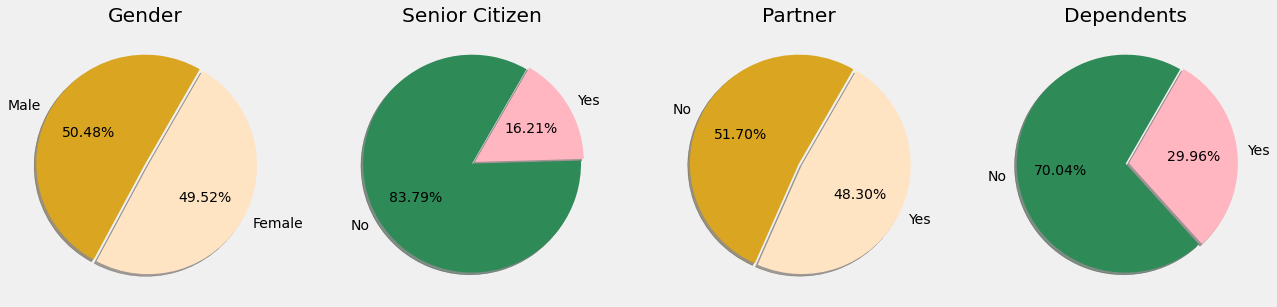

<IPython.core.display.Javascript object>

In [14]:
genero = df['gender'].value_counts(normalize=True)
idoso = df['SeniorCitizen'].value_counts(normalize=True)
est_civil = df['Partner'].value_counts(normalize=True)
filhos = df['Dependents'].value_counts(normalize=True)

colors1 = ['goldenrod', 'bisque']
colors2 = ['seagreen', 'lightpink']




explode =[0, 0.03]

fig, ax  = plt.subplots(1,4, figsize=(20,19))
ax[0].pie(genero,labels=['Male', 'Female'], autopct='%.2f%%', shadow=True, colors=colors1, explode=explode, startangle=60)
ax[0].set(title='Gender')

ax[1].pie(idoso,labels=['No', 'Yes'], autopct='%.2f%%', shadow=True, colors=colors2, explode=explode, startangle=60)
ax[1].set(title='Senior Citizen')

ax[2].pie(est_civil,labels=['No', 'Yes'], autopct='%.2f%%', shadow=True, colors=colors1, explode=explode, startangle=60)
ax[2].set(title='Partner')


ax[3].pie(filhos,labels=['No', 'Yes'], autopct='%.2f%%', shadow=True, colors=colors2, explode=explode, startangle=60)
ax[3].set(title='Dependents')

plt.show()


In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<IPython.core.display.Javascript object>

In [16]:
columns_streams = [
    
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'StreamingTV',
 'StreamingMovies'
    
]

columns_suport = [
    
    'OnlineSecurity', 
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
]

columns_payment = [
    'Contract',
    'PaymentMethod',
    'PaperlessBilling',
    'Churn'
]

<IPython.core.display.Javascript object>

# Análise do volume para as variáveis categóricas

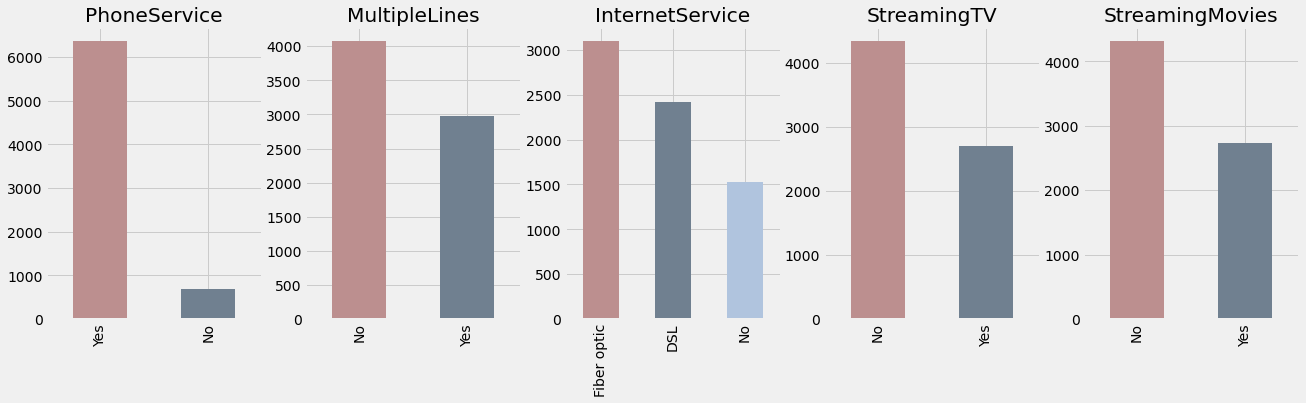

<IPython.core.display.Javascript object>

In [17]:
colors3 = ['rosybrown', 'slategrey', 'lightsteelblue']


fig, ax = plt.subplots(1, len(columns_streams), figsize=(20,5))

for i, columns_streams in enumerate(df[columns_streams]):
    df[columns_streams].value_counts().plot(kind='bar', ax=ax[i], color=colors3).set_title(columns_streams)
  
    
fig.show()



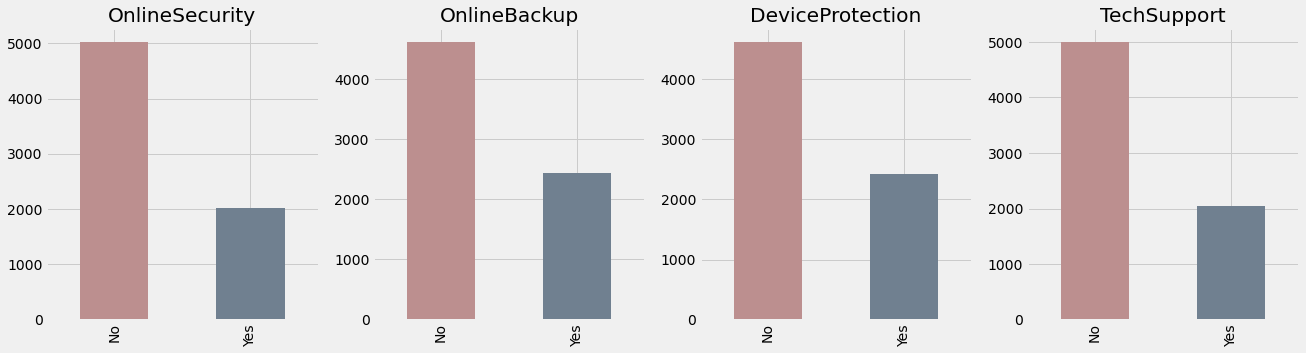

<IPython.core.display.Javascript object>

In [18]:
colors3 = ['rosybrown', 'slategrey', 'lightsteelblue']


fig, ax = plt.subplots(1, len(columns_suport), figsize=(20,5))

for i, columns_suport in enumerate(df[columns_suport]):
    df[columns_suport].value_counts().plot(kind='bar', ax=ax[i], color=colors3).set_title(columns_suport)
  
    
fig.show()

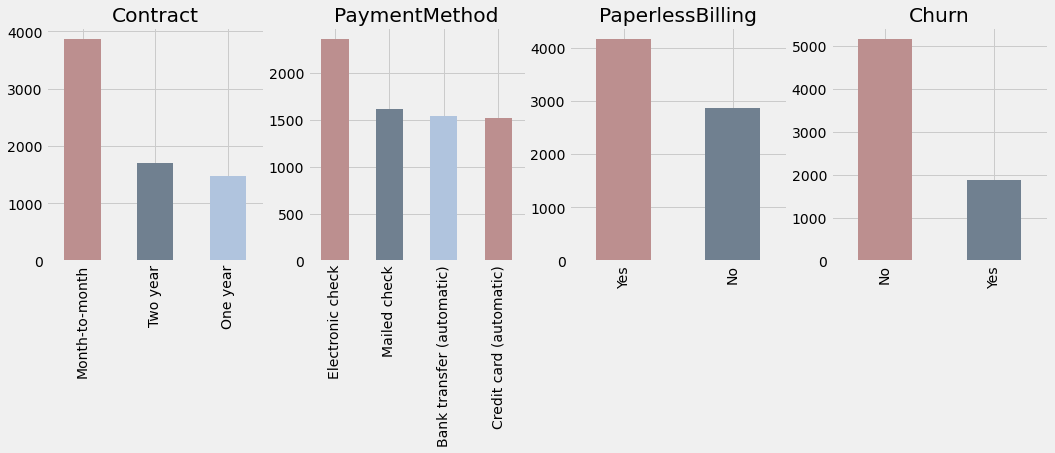

<IPython.core.display.Javascript object>

In [19]:
colors3 = ['rosybrown', 'slategrey', 'lightsteelblue']


fig, ax = plt.subplots(1, 4, figsize=(16,4))

for i, columns_payment in enumerate(df[columns_payment]):
    df[columns_payment].value_counts().plot(kind='bar', ax=ax[i], color=colors3).set_title(columns_payment)
  
    
fig.show()

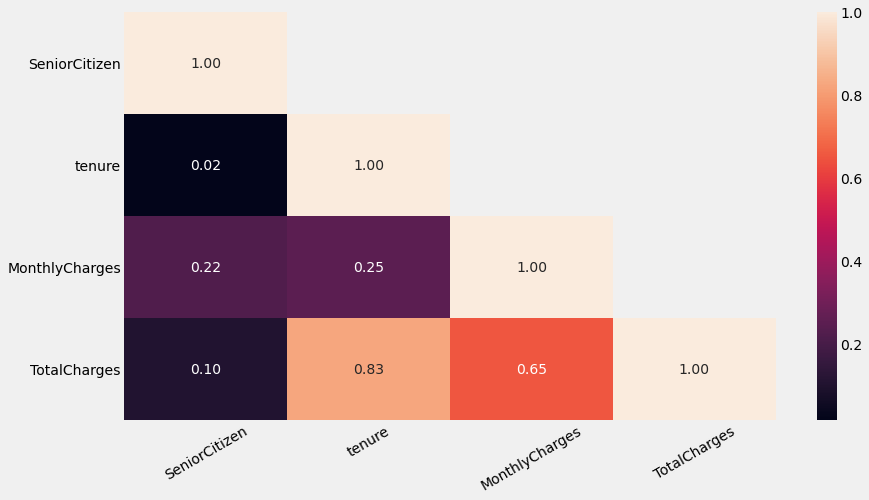

<IPython.core.display.Javascript object>

In [20]:
#Matriz de correlação antes das alterações


corr = df.corr()
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=30)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

# Análise do público alvo

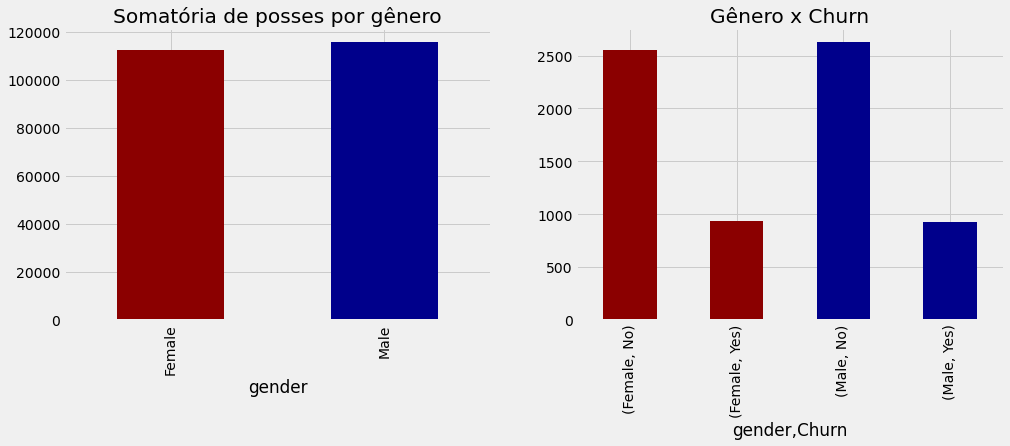

<IPython.core.display.Javascript object>

In [21]:
#Somatória de posses por sexo
colors1 = ['darkred', 'darkblue']
colors2 = ['darkred', 'darkred', 'darkblue', 'darkblue']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

df.groupby(df['gender'])['tenure'].sum().plot(kind='bar', color=colors1, ax=ax1, grid=True).set_title('Somatória de posses por gênero')


df.groupby(df['gender'])['Churn'].value_counts().plot(kind='bar', color=colors2, ax=ax2, grid=True).set_title('Gênero x Churn')

plt.show()

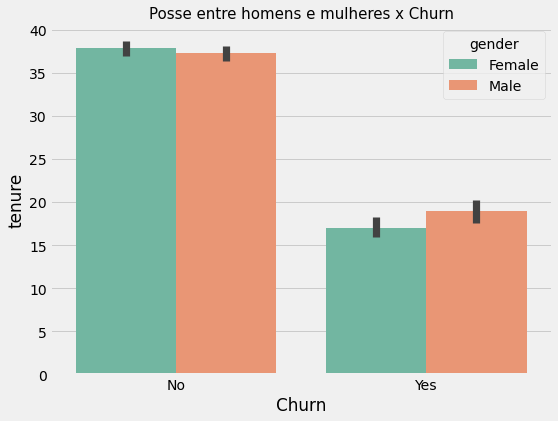

<IPython.core.display.Javascript object>

In [22]:
#cruzamento de dados entre a soma de posse por genero e a % de churn


x=df['gender']
y=df['Churn'].value_counts()

plt.figure(figsize=(8,6))

sns.barplot(y=df['tenure'], x = df['Churn'], hue=df['gender'], palette = 'Set2')
plt.title('Posse entre homens e mulheres x Churn', size=15)
plt.show()

In [23]:
analise_churn_yes = df[df['Churn'] == 'Yes']
analise_churn_yes.head(3)



analise_churn_no = df[df['Churn'] == 'No']

<IPython.core.display.Javascript object>

In [24]:
print(f'Número de pessoas que não possui a assinatura ativa {len(analise_churn_yes)}, que representam {round(len(df)/len(analise_churn_yes))}% de churn')

Número de pessoas que não possui a assinatura ativa 1869, que representam 4% de churn


<IPython.core.display.Javascript object>

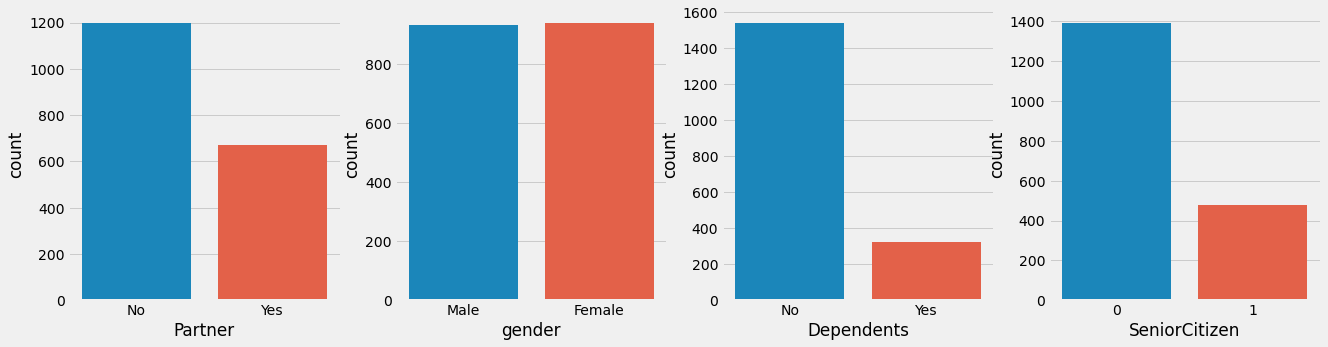

<IPython.core.display.Javascript object>

In [25]:
colors1 = ['darkred', 'darkblue']
colors2 = ['darkred', 'darkred', 'darkblue', 'darkblue']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))

sns.countplot(data=analise_churn_yes, x='Partner', ax=ax1)

sns.countplot(data=analise_churn_yes, x='gender', ax=ax2)

sns.countplot(data=analise_churn_yes, x='Dependents', ax=ax3)

sns.countplot(data=analise_churn_yes, x='SeniorCitizen', ax= ax4)

#plt.title('Contagem dentro do dataset apenas de cliente com perfil de evasão)

plt.show()

In [26]:
analise_churn_yes[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
2,2,53.85,108.15
4,2,70.70,151.65
5,8,99.65,820.50
8,28,104.80,3046.05
13,49,103.70,5036.30
...,...,...,...
7021,12,59.80,727.80
7026,9,44.20,403.35
7032,1,75.75,75.75
7034,67,102.95,6886.25


<IPython.core.display.Javascript object>

In [29]:
analise_churn_no[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
3,45,42.30,1840.75
6,22,89.10,1949.40
7,10,29.75,301.90
...,...,...,...
7037,72,21.15,1419.40
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45


<IPython.core.display.Javascript object>

In [39]:
#análise da somatória de posse por grupo colocando nas devidas proporções por grupo
a = analise_churn_yes['tenure'].sum()
b = analise_churn_no['tenure'].sum()



print(f'Número de observações com churn = yes {len(analise_churn_yes)} e somátoria de posse total {a} ')

print(f'Número de observações com churn = no {len(analise_churn_no)} e somátoria de posse total {b} ')

print(f'O número de posses para o grupo que permanece com a assinatura é 20% a mais, do que em comparação ao segundo grupo')

Número de observações com churn = yes 1869 e somátoria de posse total 33603 
Número de observações com churn = no 5174 e somátoria de posse total 194387 
O número de posses para o grupo que permanece com a assinatura é 20% a mais, do que em comparação ao segundo grupo


<IPython.core.display.Javascript object>

In [31]:
#criação de novos dataframes para estudo

df_female = df[df['gender'] == 'Female']
df_male = df[df['gender'] == 'Male']

<IPython.core.display.Javascript object>

In [32]:
# porcentagem de pessoas que querem o produto serviço de telefone para as mulheres
# Churn serviço de telefone para mulheres
churn_mulheres = df_female['PhoneService'].value_counts()[0]/df_female['PhoneService'].value_counts()[1]
print(f'Porcentagem de evasão do produto para o sexo Feminino: {round(churn_mulheres)}%')

Porcentagem de evasão do produto para o sexo Feminino: 10%


<IPython.core.display.Javascript object>

In [38]:
# porcentagem de pessoas que querem o produto serviço de telefone para os homens
# Churn serviço de telefone para homens
churn_homens = df_male['PhoneService'].value_counts()[0]/df_male['PhoneService'].value_counts()[1]
print(f'Porcentagem de evasão do produto para o sexo Masculino: {round(churn_homens)}%')

Porcentagem de evasão do produto para o sexo Masculino: 9%


<IPython.core.display.Javascript object>

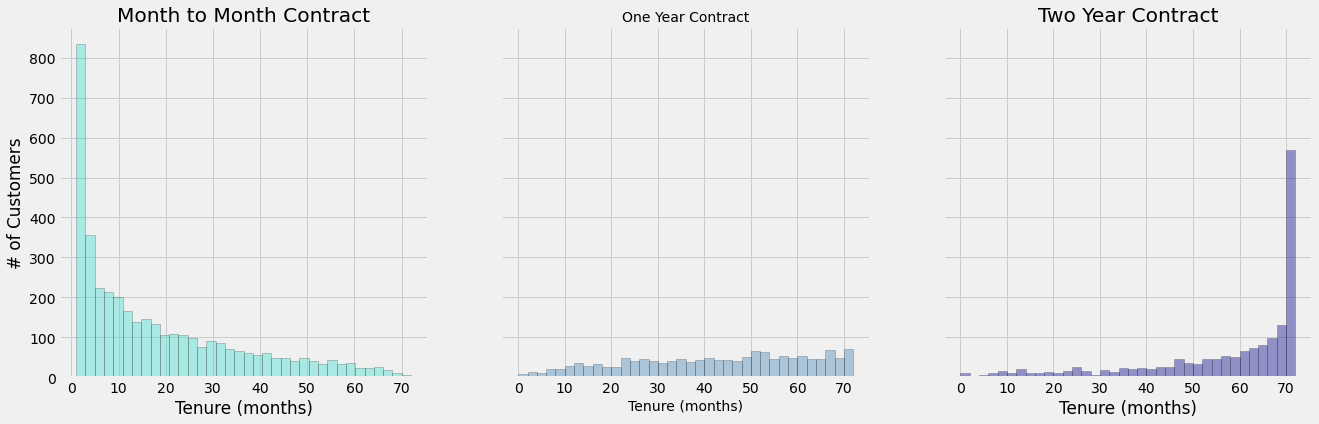

<IPython.core.display.Javascript object>

In [34]:
#Quanto de posse tem por tipo de contrato


fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')
plt.show()

até esse momento da exploração, a distribuição entre homens e mulheres estão bem disbrituidas, assim como 
a posse por genero. Entre mulheres e homens que tem o mesmo número de posse, também deu na mesma.


In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<IPython.core.display.Javascript object>

In [36]:
df.to_csv('DataFrame-Modelo.csv')

<IPython.core.display.Javascript object>